<a href="https://colab.research.google.com/github/alswnsdlf/project_3/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import sqlite3
import psycopg2

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from eli5.sklearn import PermutationImportance
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from pandas.io.parsers import read_csv

In [ ]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv
import io

In [167]:
from google.colab import files
myfile = files.upload()

Saving coronaa.csv to coronaa.csv


In [168]:
df = pd.read_csv('coronaa.csv')
df

,rainfall(mm),avgT,LowT,HighT,seoulDiag,seoulDadd,under_treatment,cured,dead,sus_patient,sus_patient_checking,sus_pat_negative
0,6.7,7.4,6.5,8.2,10,0,10,0,0,741,77,664
1,0.0,6.5,4.9,8.7,10,0,10,0,0,802,61,741
2,0.0,8.1,3.2,14.7,10,0,10,0,0,840,38,802
3,2.0,9.8,6.2,15.6,10,0,10,0,0,864,24,840
4,13.4,-1.4,-4.3,7.7,11,0,11,0,0,876,13,863
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.0,23.6,21.7,26.5,104033,521,14786,88585,662,0,0,0
438,6.4,18.8,17.9,21.7,104723,690,14497,89560,666,0,0,0
439,4.6,19.4,17.9,21.9,105558,837,14573,90316,669,0,0,0
440,3.5,18.8,17.5,20.0,106332,776,13591,92067,674,0,0,0


In [169]:
def dd(x):
  if x >= 1:
    return 0
  else :
    return 1

df['rainfall(mm)'] = df['rainfall(mm)'].apply(dd)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rainfall(mm)          442 non-null    int64  
 1   avgT                  442 non-null    float64
 2   LowT                  442 non-null    float64
 3   HighT                 442 non-null    float64
 4   seoulDiag             442 non-null    int64  
 5   seoulDadd             442 non-null    int64  
 6   under_treatment       442 non-null    int64  
 7   cured                 442 non-null    int64  
 8   dead                  442 non-null    int64  
 9   sus_patient           442 non-null    int64  
 10  sus_patient_checking  442 non-null    int64  
 11  sus_pat_negative      442 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 41.6 KB


In [172]:
df.isna().sum().sort_values()

rainfall(mm)            0
avgT                    0
LowT                    0
HighT                   0
seoulDiag               0
seoulDadd               0
under_treatment         0
cured                   0
dead                    0
sus_patient             0
sus_patient_checking    0
sus_pat_negative        0
dtype: int64

In [173]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [174]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from eli5.sklearn import PermutationImportance
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

In [175]:
target = 'rainfall(mm)'

In [176]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.6, test_size=0.4, random_state=2)
train.shape, test.shape

((265, 12), (177, 12))

In [177]:
train, val = train_test_split(train, test_size=0.2, stratify=train[target], random_state=2)
train.shape, val.shape, test.shape

((212, 12), (53, 12), (177, 12))

In [178]:
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [179]:
X_train = train[features]
X_train.value_counts(normalize=True)

avgT   LowT   HighT  seoulDiag  seoulDadd  under_treatment  cured  dead  sus_patient  sus_patient_checking  sus_pat_negative
 29.8   26.8   34.3  64359      476        7760             56065  534   0            0                     0                   0.004717
 13.3   8.5    18.4  5395       19         859              4475   61    0            0                     0                   0.004717
 13.1   9.9    17.1  629        1          244              383    2     109708       5340                  104368              0.004717
 13.0   10.1   17.1  750        14         159              587    4     152205       8590                  143615              0.004717
        7.2    18.0  33441      244        2469             30541  431   0            0                     0                   0.004717
                                                                                                                                  ...   
 22.0   17.4   26.2  92532      676        11394     

In [180]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
rainfall(mm),212.0,0.660377,0.474702,0.0,0.000,1.00,1.00,1.0
avgT,212.0,15.450943,9.861907,-14.9,10.150,18.45,23.70,29.8
LowT,212.0,11.654245,10.403009,-18.6,5.400,13.70,20.10,26.8
HighT,212.0,19.888208,9.736023,-10.7,14.675,22.95,27.15,34.3
seoulDiag,212.0,22819.740566,27740.760309,10.0,1425.750,6773.50,38860.75,107041.0
seoulDadd,212.0,158.533019,204.729237,0.0,13.000,102.50,205.00,1054.0
under_treatment,212.0,2806.117925,3548.912998,10.0,313.000,1727.00,3618.25,14786.0
cured,212.0,19794.858491,24498.793632,0.0,1215.000,5879.50,35623.00,93754.0
dead,212.0,218.764151,228.607242,0.0,9.000,81.00,453.25,678.0
sus_patient,212.0,66272.018868,117305.319094,0.0,0.000,0.00,101889.00,364796.0


In [181]:
y_train = train[target]
y_train.value_counts(normalize=True)

1    0.660377
0    0.339623
Name: rainfall(mm), dtype: float64

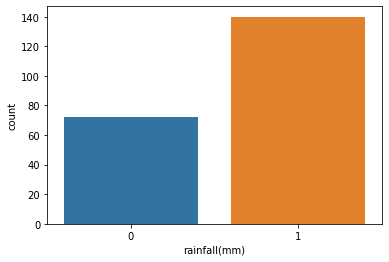

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [183]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from scipy.stats import randint, uniform

In [213]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10)
)

dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(10, 140, 200), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 100, 200, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=100, 
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


In [214]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.8753565120885833, 'randomforestclassifier__n_estimators': 287, 'simpleimputer__strategy': 'mean'}
MAE:  0.2971160295103957


In [215]:
pipe = clf.best_estimator_
y_pred = pipe.predict(X_val)

In [216]:
F1_score = f1_score(y_pred, y_val)
F1_score

0.8536585365853657

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pickle
from sklearn.externals import joblib

In [218]:
saved_model = pickle.dumps(clf)

In [219]:
clf_from_pickle = pickle.loads(saved_model)

In [220]:
joblib.dump(clf, 'coronaa.pkl') 

['coronaa.pkl']

In [222]:
from sklearn.externals import joblib
model = joblib.load('coronaa.pkl') 

In [223]:
model

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,


In [204]:
conn = psycopg2.connect(
    host="fanny.db.elephantsql.com",
    database="yowummal",
    user="yowummal",
    password="kE9KWhUhHhZt83Cl-z1waJE9HIG0bgbP")

In [205]:
print(conn)

<connection object at 0x7fc334a40b90; dsn: 'user=yowummal password=xxx dbname=yowummal host=fanny.db.elephantsql.com', closed: 0>


In [207]:
conn = sqlite3.connect('coronaa.db')

In [208]:
conn

In [224]:
import pickle
with open('coronaa.pkl', 'wb') as m:
    pickle.dump(clf.best_estimator_, m)